<a href="https://colab.research.google.com/github/carlos-alves-one/Comparing-Two-AI-Models/blob/master/Comparing_Two_AI_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goldsmiths University of London
**Author....: Carlos Manuel de Oliveira Alves**<br>
**Student..: cdeol003**<br>
**Created..: 18/08/2022**

## Generate Sample Data

In [2]:
# import libraries
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # statistics
import sklearn.metrics as metrics
import matplotlib.pyplot as plt # ploting the data
import random

In [3]:
# generate sample BLEU scores for paired t-test
from numpy import random
random.seed(0) # seed() method is used to initialize the random number generator

# make bleu_x mean 0.63
bleu_x = random.randint(0, 40, size = 500) / 100
bleu_x = bleu_x - np.mean(bleu_x) + 0.63

# make bleu_y mean 0.44
bleu_y = random.randint(0, 70, size = 500) / 100
bleu_y = bleu_y - np.mean(bleu_y) + 0.44

# create a dictionary with the bleu's and store it in a file
bleu_dict = {"model1": bleu_x, "model2": bleu_y}
bleu_save = pd.DataFrame.from_dict(bleu_dict)
bleu_save.to_csv('bleu_scores.csv')


## Paired t-test

## Problem:
**Model 1 BLEU scores $= x = (x_1, x_2,...,x_{500})$**<br>
**Model 2 BLEU scores $= y = (y_1, y_2,...,y_{500})$**<br>
**Difference $= d = x - y$**<br>

In [4]:
# read the dataframe
bleus = pd.read_csv('bleu_scores.csv')

# use the head function to print the first 10 rows of BLEU'S
bleus.head()

,Unnamed: 0,model1,model2
0,0,0.43552,0.44414
1,1,0.46552,0.23414
2,2,0.46552,0.77414
3,3,0.82552,0.21414
4,4,0.52552,0.38414


In [6]:
# find the means of the BLEUS
np.mean(bleus) # the mean function returns the average of the array element

Unnamed: 0    249.50
model1          0.63
model2          0.44
dtype: float64

(array([59., 48., 50., 41., 49., 52., 48., 50., 56., 47.]),
 array([0.43552, 0.47452, 0.51352, 0.55252, 0.59152, 0.63052, 0.66952,
        0.70852, 0.74752, 0.78652, 0.82552]),
 <a list of 10 Patch objects>)

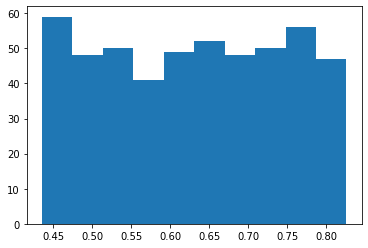

In [7]:
# check distribution of model 1
plt.hist(bleus['model1'])

(array([61., 57., 50., 47., 61., 50., 38., 45., 43., 48.]),
 array([0.11414, 0.18314, 0.25214, 0.32114, 0.39014, 0.45914, 0.52814,
        0.59714, 0.66614, 0.73514, 0.80414]),
 <a list of 10 Patch objects>)

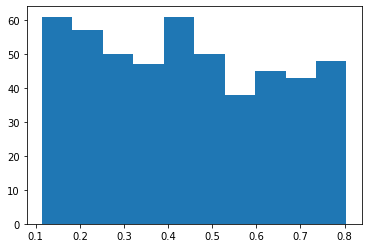

In [8]:
# check distribution of model 2
plt.hist(bleus['model2'])